In [5]:
for i in range(0, 52, 1):
    filename = (str(i) + ".inp")
    target = open(filename, 'w+')
    pos = 0.25 - i * (0.25 / 50)
    target.write("""include /home/ben/Documents/na3ocl_project/gulp_calcs/data/na3ocl_structure.inp
""")
    target.write(f"centre 0.5 0.25 0.25")
    target.write("""
size 12 16
vacancy 0.5 0.5 0.0
vacancy 0.5 0.0 0.5
""")
    target.write(f"intersitial Na 0.5 {pos:.16f} {pos:.16f} fix")
    target.write("""
include /home/ben/Documents/na3ocl_project/gulp_calcs/data/na3ocl_khandy_potentials.inp    
""")

In [6]:
import glob
import subprocess
from tqdm import tqdm
import multiprocessing
from time import sleep
import random

def gulp(input_path):
    sleep(random.random())
    run = True
    output_path = input_path[:-3] + 'out'
    try:
        with open(output_path) as f:
            file = f.read()
        if 'Job Finished at' in file:
            run = False
    except:
        pass
    if run:
        with open(input_path) as f:
            output_path = input_path[:-3] + 'out'
            with open(output_path, 'w') as o:
                try:
                    a = subprocess.run(['gulp'], stdin = f, stdout = o, timeout=None)
                except:
                    pass

all_cases = sorted(glob.glob('*.inp'), key = lambda x: x.split('/')[-1].split('.')[0])

complete = []

for case in all_cases:
    try:
        with open(case[:-3] + 'out', 'r') as f:
            g = f.read()
        if 'Final energy' in g:
            complete.append(case)
    except:
        pass

cases = [case for case in all_cases if case not in complete]

N = len(cases)

def update():
    pbar.update(1)

if __name__ == '__main__':
    with multiprocessing.Pool() as pool:
        for result in tqdm(pool.imap_unordered(gulp, cases), total=len(cases)):
            pass
    pool.close()
    pool.join()

100%|██████████| 52/52 [02:20<00:00,  2.70s/it]


In [15]:
import re
import glob
import numpy as np

def getEnergy(path):
    with open(path) as file:
        content = file.readlines()
    for line in content:
        if "Final defect energy" in line:
            return float(re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", line)[0])
        else:
            continue
    
def energyList(data):
    files = glob.glob(data)
    energies = dict()
    for f in files:
        energies[f] = getEnergy(f)
    return energies

energy = energyList('*.out')
energies = []

for i in range(0, 51):
        try:
            energies.append(energy[f'{i}.out'] - energy['0.out'])
        except:
            pass
        
print(energies)
print(min(energies))

[0.0, -0.026194850000000436, -0.04992405000000044, -0.07119433999999991, -0.09000740000000018, -0.10637498000000001, -0.12030347000000052, -0.13180908000000002, -0.1409032400000001, -0.14760445000000022, -0.15193344000000053, -0.15390789000000016, -0.15355147999999996, -0.1508930700000004, -0.1459543400000003, -0.13876664000000005, -0.12936371999999974, -0.11777637000000052, -0.10403877999999978, -0.0881918500000003, -0.07025248999999967, -0.050308089999999694, -0.02838481000000037, -0.004533330000000113, 0.021191680000000268, 0.04873101999999996, 0.07801724000000032, 0.10898457999999955, 0.14155731999999954, 0.17564844999999973, 0.21117113000000032, 0.2480273799999999, 0.28609550000000006, 0.32527082000000007, 0.36540193, 0.40634777999999994, 0.44793987999999985, 0.4900097900000002, 0.5323623499999997, 0.5747894000000002, 0.6170694000000001, 0.6589873199999996, 0.7003199999999996, 0.7408501999999997, 0.7803918599999999, 0.8187813500000001, 0.8558870299999999, 0.8916048099999996, 0.925

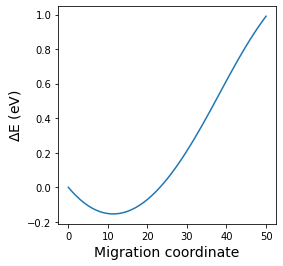

In [8]:
import matplotlib.pyplot as plt

x = list(range(0,51))
y = []


for i in range(0, 51):
    try:
        y.append(energy[f'{i}.out'] - energy['0.out'])
    except:
        pass
    
plt.plot(x, y)
plt.xlabel('Migration coordinate', size =14)
plt.ylabel('$\mathrm{\Delta}$E (eV)', size=14)

def make_square_axes(ax):
    """Make an axes square in screen units.

    Should be called after plotting.
    """
    ax.set_aspect(1 / ax.get_data_ratio())

make_square_axes(plt.gca())